# Decision Trees and Random Forests and some unorthodox usages
```In this exercise we will experience with Decision Trees and Random Forests. These are widely used algorithms in machine learning problem. Here we will understand the basics of those algorithms. In addition, we will see some less orthodox usages of them.```

```During the exercise you will be asked some questions. You can identify the questions by the appearance of a question mark. Please answer the questions in your notebook for further discussion with your instructor.
Enjoy!```

```~Ittai Haran```

## Part I
### Making things work
```Here we will experience with Decision Trees and Random Forests. During this part you will explore the different features of them and will plot your results for further discussion with your instructor. Hence, whenever exploration tasks are marked with (*), know that you are asked to plot a two graphs (on the same plot): the training score against the explored feature and the test score against it.```

```Before you start, make sure you understand how Decision trees work (wikipedia will do). Make sure you understand how are the splits in the tree done. Talk about it with your instructor.```

In [3]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

```Read the dataset. In this dataset, you are provided over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id.```

In [4]:
df = pd.read_csv('data/insurance.csv')
columns = list(df.dtypes[df.dtypes.apply(lambda x: not str(x) == 'object' )].index)
df = df[columns].fillna(0)
target = df['Response']
df = df.drop(['Response', 'Id'], axis = 1)
df_train, df_test, target_train, target_test = train_test_split(df, target, train_size = 0.7, test_size = 0.3)

```We will start by using Decision trees. Use a simple DecisionTreeClassifier with default values to predict on your train and on your test. Evaluate the model using the accuracy metric, which you can find in sklearn.```

In [6]:
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(df_train, target_train)

print("train accuracy= ", accuracy_score(target_train, decision_tree_model.predict(df_train)))
print("test accuracy= ", accuracy_score(target_test, decision_tree_model.predict(df_test)))

train accuracy=  0.9999759418755714
test accuracy=  0.4237440359247825


```Unfortunately, you are at overfit. Now let's try to get better. Try playing with the max depth of the tree (change it at the object initialization). Vary the depth from 1 to 25. (*) (That means you are asked to plot some graphs, remember? :) )```
```Choose the optimal max_depth based on the graph you got.```

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:21<00:00,  1.16it/s]


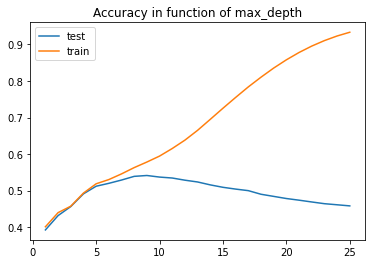

Best mx_depth =  9


In [12]:
from tqdm import tqdm

test_accuracy, train_acuracy = [], []
for max_depth in tqdm(np.linspace(1, 25, 25)):
    decision_tree_model = DecisionTreeClassifier(max_depth=max_depth)
    decision_tree_model.fit(df_train, target_train)
    test_accuracy.append(accuracy_score(target_test, decision_tree_model.predict(df_test)))
    train_acuracy.append(accuracy_score(target_train, decision_tree_model.predict(df_train)))
    
plt.figure()
plt.plot(np.linspace(1, 25, 25), test_accuracy, label="test")
plt.plot(np.linspace(1, 25, 25), train_acuracy, label="train")
plt.legend()
plt.title("Accuracy in function of max_depth")
plt.show()
plt.close()

print("Best mx_depth = ", np.argmax(test_accuracy)+1)

```Choose the best max_depth you found. Now try playing with min_samples_leaf. use the following values:
[1, 10, 100, 300,700, 1000]. Do it also with max_depth = 20. What can we learn from the graphs? (*)```

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:07<00:00,  1.33s/it]


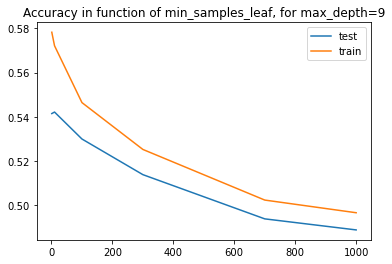

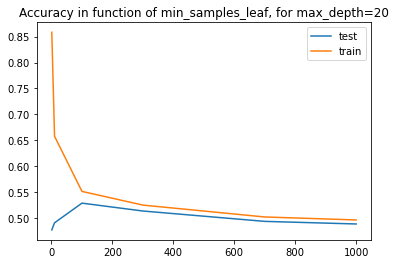

In [14]:
test_accuracy1, train_acuracy1 = [], []
test_accuracy2, train_acuracy2 = [], []
min_samples_leaves = [1, 10, 100, 300, 700, 1000]
for min_samples_leaf in tqdm(min_samples_leaves):
    decision_tree_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=min_samples_leaf)
    decision_tree_model.fit(df_train, target_train)
    test_accuracy1.append(accuracy_score(target_test, decision_tree_model.predict(df_test)))
    train_acuracy1.append(accuracy_score(target_train, decision_tree_model.predict(df_train)))
    
    decision_tree_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=min_samples_leaf)
    decision_tree_model.fit(df_train, target_train)
    test_accuracy2.append(accuracy_score(target_test, decision_tree_model.predict(df_test)))
    train_acuracy2.append(accuracy_score(target_train, decision_tree_model.predict(df_train)))
    
plt.figure()
plt.plot(min_samples_leaves, test_accuracy1, label="test")
plt.plot(min_samples_leaves, train_acuracy1, label="train")
plt.legend()
plt.title("Accuracy in function of min_samples_leaf, for max_depth=9")
plt.show()
plt.close()
          
plt.figure()
plt.plot(min_samples_leaves, test_accuracy2, label="test")
plt.plot(min_samples_leaves, train_acuracy2, label="train")
plt.legend()
plt.title("Accuracy in function of min_samples_leaf, for max_depth=20")
plt.show()
plt.close()

```Decision Tree is a very nice algorithm, especially because it is very intuitive and explainable. We can even draw it!
Train a simple Decision Tree with max_depth = 3. Call it basic_tree and run the cell below.```

In [15]:
basic_tree = DecisionTreeClassifier(max_depth=3)
basic_tree.fit(df_train, target_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(basic_tree, out_file = 'tree.dot', filled  = True,
                rounded = True, feature_names = df.columns)
!dot -Tpng tree.dot -o tree.png & del tree.dot

'dot' is not recognized as an internal or external command,
operable program or batch file.


```Look at the tree you got. What, would you say, are the most important features?
Do it again, this time by using its feature_importance_ attribute. Make sure you understand what you see :)```

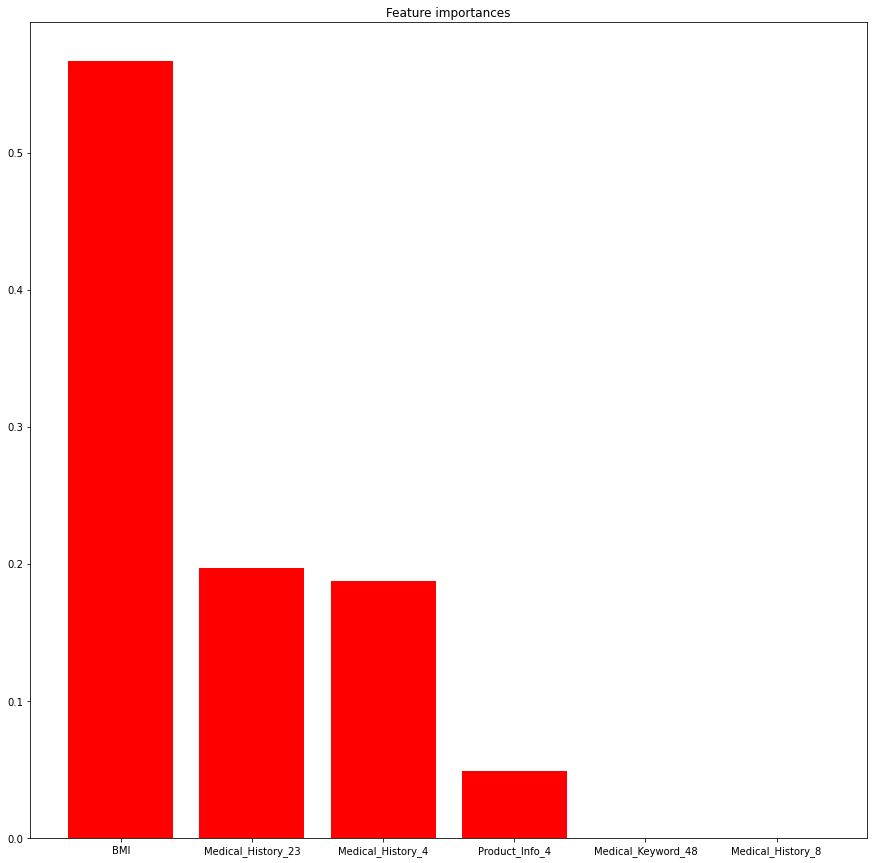

In [18]:
importances = basic_tree.feature_importances_
indices = np.argsort(importances)[::-1]
features_name = df_train.columns

# Take only 5 best
importances_20 = importances[indices][0:6]
features_20 = features_name[indices][0:6]

plt.figure(figsize=(15,15))
plt.title("Feature importances")
plt.bar(features_20, importances_20,
        color="r", align="center")
plt.show()
plt.close()

```We will now move on to Random Forest. Repeat the exploration tasks with a Random forest with 100 trees. In addition, vary the number of trees between 10 and 400, while maintaining low max_depth (*) and the max_feature parameter, between 0.1 and 1 (*). Try explaining the graphs you see. Use the flag n_jobs = -1 in your experiments to accelerate your computation time. Make sure to understand where your model is overfitted.```

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:41<00:00,  2.06s/it]


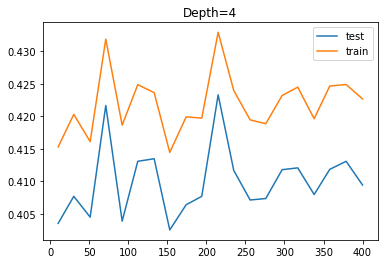

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:27<00:00,  4.38s/it]


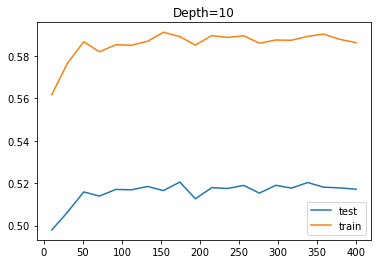

In [20]:
from sklearn.ensemble import RandomForestClassifier

def search_nb_estimators(depth):
    test_acc, train_acc = [], []
    number_of_trees = np.linspace(10, 400, 20, dtype=int)

    for tree in tqdm(number_of_trees):
        random_forest = RandomForestClassifier(n_estimators=tree, max_depth=depth, n_jobs=-1)
        random_forest.fit(df_train, target_train)
        train_acc.append(accuracy_score(target_train, random_forest.predict(df_train)))
        test_acc.append(accuracy_score(target_test, random_forest.predict(df_test)))

    plt.figure()
    plt.title("Depth=" + str(depth))
    plt.plot(number_of_trees, test_acc, label="test")
    plt.plot(number_of_trees, train_acc, label="train")
    plt.legend()
    plt.show()
    plt.close()
    
search_nb_estimators(depth=4)
search_nb_estimators(depth=10)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.33it/s]


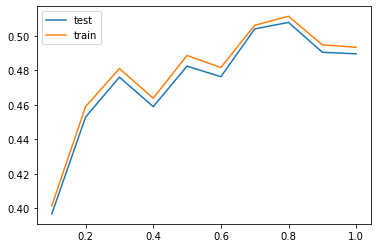

In [21]:
max_features_list = np.arange(0.1,1.1,0.1)
test_acc, train_acc = [], []

for max_features in tqdm(max_features_list):
    random_forest = RandomForestClassifier(n_estimators=2, max_depth=4, n_jobs=-1, max_features=max_features)
    random_forest.fit(df_train, target_train)
    test_acc.append(accuracy_score(target_test, random_forest.predict(df_test)))
    train_acc.append(accuracy_score(target_train, random_forest.predict(df_train)))
    
plt.figure()
plt.plot(max_features_list, test_acc, label="test")
plt.plot(max_features_list, train_acc, label="train")
plt.legend()
plt.show()

```Use the Random Forest to defeat the Decision Tree.```

In [22]:
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier()

max_features = np.arange(0.1,1.1,0.1)
min_samples_split = [5, 10, 15]
min_samples_leaf = [1, 2, 4, 5]
bootstrap = [True, False]
criterion = ['gini', 'entropy']
n_estimators = [10,40,80,120,180,200,250,300]
max_depth = np.linspace(1, 20, 20, dtype=int)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion,
               }

scoring = make_scorer(metrics.accuracy_score)

random_model = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                                              n_iter=500, verbose=2, n_jobs=-1,
                                              return_train_score=True, cv=3, scoring=scoring)
random_model.fit(df_train, target_train)

y_pred = random_model.predict(df_test)
print("Final accuracy", accuracy_score(target_test, y_pred))
print("Best params", random_model.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 60.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 113.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 174.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 267.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 276.4min finished


Final accuracy 0.5662643839461128
Best params {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 0.4, 'max_depth': 16, 'criterion': 'gini', 'bootstrap': False}


## Part II
### Feature selection
```We will now try using the feature_importance we can get from our models to do a wise feature selection.```

```Do the following:```
- ```Take the best Random Forest model you got at the last part.```
- ```Select the top 20 feature with the greatest feature importance.```
- ```Train a KNN model with n_neighbors = 8 (and n_jobs = -1). What is its accuracy?```
- ```Train a KNN model using the 20 features you found, again with n_neighbors = 8 (and n_jobs = -1). What is its accuracy? What can we learn from it?```
- ```Repeat the two last tasks, this time with the best Random Forest configuration you found. Can you explain the results?```
- ```Draw a graph where the y axis is a feature_importance sum, and the x axis is the number of features you must take to get this sum. How can this graph help you to explain your results?```

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Best_params = {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 0.4, 
               'max_depth': 16, 'criterion': 'gini', 'bootstrap': False}

random_forest = RandomForestClassifier(**Best_params)
random_forest.fit(df_train, target_train)

importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
features_name = df_train.columns

importances_20 = importances[indices][0:20]
features_20 = features_name[indices][0:20]

print(importances_20)
print(features_20)

[0.20466285 0.08243523 0.07800371 0.07184266 0.05961113 0.04868957
 0.04483588 0.03720777 0.02583132 0.02262179 0.02067139 0.01745941
 0.01597412 0.01580565 0.01575263 0.01561649 0.0148925  0.01449022
 0.0142484  0.01381245]
Index(['BMI', 'Wt', 'Medical_History_4', 'Product_Info_4',
       'Medical_History_15', 'Medical_History_23', 'Ins_Age',
       'Medical_Keyword_15', 'Medical_Keyword_3', 'Employment_Info_1',
       'Family_Hist_3', 'Family_Hist_4', 'Employment_Info_6',
       'Medical_History_1', 'Ht', 'Medical_History_2', 'Family_Hist_5',
       'InsuredInfo_6', 'Family_Hist_2', 'Insurance_History_5'],
      dtype='object')


In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 8, n_jobs=-1)
clf.fit(df_train, target_train)
print("acc KNN=", accuracy_score(target_test, clf.predict(df_test)))

clf = KNeighborsClassifier(n_neighbors = 8, n_jobs=-1)
clf.fit(df_train[features_20], target_train)
print("acc KNN 20 features=", accuracy_score(target_test, clf.predict(df_test[features_20])))

acc KNN= 0.3320797081111423
acc KNN 20 features= 0.3722144260454673


In [7]:
random_forest = RandomForestClassifier(**Best_params)
random_forest.fit(df_train, target_train)
print("acc RF=", accuracy_score(target_test, random_forest.predict(df_test)))

random_forest = RandomForestClassifier(**Best_params)
random_forest.fit(df_train[features_20], target_train)
print("acc RF 20 features=", accuracy_score(target_test, random_forest.predict(df_test[features_20])))

acc RF= 0.5691832725231546
acc RF 20 features= 0.5540836373842267


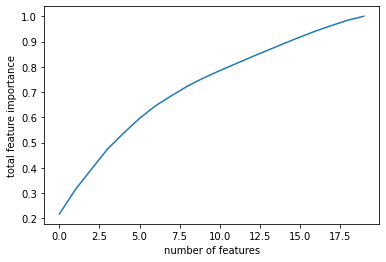

In [8]:
sorted_importance = sorted(random_forest.feature_importances_, reverse = True)
sorted_importance = np.array([sum(sorted_importance[:i+1]) for i in range(len(sorted_importance))])
plt.plot(sorted_importance)
plt.xlabel('number of features')
plt.ylabel('total feature importance')
plt.show()

```We will now implement a primitive reduction of Seffi's feature selection method (you are encouraged to ask him about it):```
- ```Take the best Random Forest model you found.```
- ```Create a dictionary that holds {feature: its importance}.```
- ```Transpose the df matrix, so we may think on the columns as 'samples' and vice versa.```
- ```Normalize each 'sample', so its length is 1.```
- ```Use KMeans with n_clusters = 20 on the 'samples'.```
- ```From each cluster take the feature with the highest feature importance.```

In [9]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

random_forest = RandomForestClassifier()
random_forest.fit(df_train, target_train)

feature_importance_dict = dict(zip(df.columns, random_forest.feature_importances_))
df_transpose = df.transpose()

norma = Normalizer()
df_transpose = norma.fit_transform(df_transpose)

kmeans_model = KMeans(n_clusters=20, n_jobs=-1)
features_clustering = kmeans_model.fit_predict(df_transpose)

feature_importance_list = []
for feature in df.columns:
    feature_importance_list.append(feature_importance_dict[feature])

df_features = pd.DataFrame({
    "kmeans_predict": features_clustering,
    "feature_importance": feature_importance_list,
    "name_features": df.columns
})

df_features.head()

C:\Users\RONENAH\Anaconda3\envs\formation_env\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,kmeans_predict,feature_importance,name_features
0,1,0.002832,Product_Info_1
1,1,0.006139,Product_Info_3
2,1,0.044224,Product_Info_4
3,1,0.001025,Product_Info_5
4,1,0.006838,Product_Info_6


In [43]:
ranking_features = df_features.groupby("kmeans_predict").apply(lambda x: x.loc[x['feature_importance'] == x['feature_importance'].max(),
                                                            ['feature_importance', 'name_features']])

In [46]:
feature_importants = ranking_features['name_features'].values
print(feature_importants)

['Medical_Keyword_37' 'BMI' 'Medical_Keyword_43' 'Medical_Keyword_6'
 'Medical_Keyword_14' 'Medical_Keyword_27' 'Medical_Keyword_36'
 'Medical_Keyword_24' 'Medical_Keyword_19' 'Medical_History_1'
 'Medical_Keyword_44' 'Medical_History_24' 'Medical_Keyword_2'
 'Medical_Keyword_35' 'Medical_Keyword_20' 'Medical_Keyword_17'
 'Medical_Keyword_31' 'Medical_Keyword_29' 'Medical_Keyword_5'
 'Medical_Keyword_41']


```Repeat the KNN inspecting, this time with the feature you got using Seffi's method. What features are better? Can you think of something you would change in the method described above? why?```

In [47]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 8, n_jobs=-1)
clf.fit(df_train, target_train)
print("acc KNN=", accuracy_score(target_test, clf.predict(df_test)))

clf = KNeighborsClassifier(n_neighbors = 8, n_jobs=-1)
clf.fit(df_train[feature_importants], target_train)
print("acc KNN 20 features=", accuracy_score(target_test, clf.predict(df_test[feature_importants])))

random_forest = RandomForestClassifier(**Best_params)
random_forest.fit(df_train, target_train)
print("acc RF=", accuracy_score(target_test, random_forest.predict(df_test)))

random_forest = RandomForestClassifier(**Best_params)
random_forest.fit(df_train[feature_importants], target_train)
print("acc RF 20 features=", accuracy_score(target_test, random_forest.predict(df_test[feature_importants])))

acc KNN= 0.3320797081111423
acc KNN 20 features= 0.3547010945832164
acc RF= 0.5692955374684255
acc RF 20 features= 0.43222003929273084


In [73]:
from sklearn.metrics import mutual_info_score
from math import log, e

def SU(x_i, x_j):
    def entropy(labels, base=None):
        """ Computes entropy of label distribution. """
        n_labels = len(labels)
        if n_labels <= 1:
            return 0
        value, counts = np.unique(labels, return_counts=True)
        probs = counts / n_labels
        n_classes = np.count_nonzero(probs)
        if n_classes <= 1:
            return 0
        ent = 0.
        # Compute entropy
        base = e if base is None else base
        for i in probs:
            ent -= i * log(i, base)
        return ent

    return 2 * (mutual_info_score(x_i, x_j) / (entropy(x_i) + entropy(x_j)))

def FCBF(X, C, delta=0.05):
    """
    https://www.aaai.org/Papers/ICML/2003/ICML03-111.pdf
    """
    features_name = X.columns
    
    X = X.values
    C = C.values

    N = X.shape[1]
    S_list = []
    for i in range(N):
        SU_i_c = SU(X[:, i], C)
        if SU_i_c > delta:
            S_list.append((i, SU_i_c, features_name[i]))
    
    S_list = sorted(S_list, key=lambda x: x[1], reverse=True)
    S_list.append(("end", ""))
    S_list.append(("end", ""))
    
    idx_p = 0
    Fp = S_list[idx_p]
    
    while Fp[0] != "end":
        idx_q = idx_p + 1
        Fq = S_list[idx_q]
        while Fq[0] != "end":
            if SU(X[:, Fp[0]], X[:, Fq[0]]) > Fq[1]:
                S_list.remove(Fq)
                Fq = S_list[idx_q]
            else:
                idx_q += 1
                Fq = S_list[idx_q]
        Fp = S_list[idx_p]
        idx_p += 1
    
    S_list.remove(("end", ""))
    S_list.remove(("end", ""))
    return S_list

print(FCBF(df_train, target_train))

[(9, 0.0928986013803506, 'BMI'), (91, 0.06591163989555808, 'Medical_Keyword_15'), (58, 0.06472143871507746, 'Medical_History_23'), (39, 0.06368801855309118, 'Medical_History_4')]


In [74]:
for delta in [0.001, 0.01, 0.02, 0.05, 0.1]:
    feature_importants = FCBF(df_train, target_train, delta=delta)
    feature_importants = [x[2] for x in feature_importants]

    random_forest = RandomForestClassifier(**Best_params)
    random_forest.fit(df_train[feature_importants], target_train)
    print("acc RF selection features=", accuracy_score(target_test, random_forest.predict(df_test[feature_importants])))

['BMI', 'Medical_Keyword_15', 'Medical_History_23', 'Medical_History_4']
acc RF selection features= 0.4584339040134718


## Part III
### Model explaining- LIMING things up
```We will try to explain complicated models using Decision Trees, and will get to know some concepts in the field.```

```We will use the MNIST data set.```

In [ ]:
df = pd.read_csv('data/MNIST_train.csv')
target = df['label']
df = df.drop('label', axis = 1)
df_train, df_test, target_train, target_test = train_test_split(df, target, train_size = 0.7, test_size = 0.3)

```Train a LGBMClassifier on the data set, using max_depth=10, n_estimators=250 (and, of course, n_jobs = -1). How good is your model?```

```Read The short paper Model-Agnostic Interpretability of Machine Learning by Riberio et al, which you can find in the papers directory. We are about to try to make the LIME method proposed in the paper work, using Decision Tree. We would like to train a simple and interpretable model that predicts, locally, the predictions of our LGBMClassifier.
Create the targets (train and test) for the interpretable model, as described in the paper.```

```Create a function that gets a sample and returns a weight function. The weight function will get a sample (or multiple samples) and return the each sample's weight, using the following function: ``` y_weight $ = \frac{1}{|x-y|+1}$

```where x is the original sample and y is the sample that we would like to get its weight.
Note: we are about to use this function in order to define the "neighborhood" of a point - this definition is crucial in LIME.```

```Make sure your function is good: pick a sample and print the images of the 20 most weighted samples in the data set, compared to the sample you picked.```

```for every digit, do the following:```
- ```take a sample of it from the dataset.```
- ```Our interpretable model is going to be a decision tree with max_depth = 5. Create the model.```
- ```Train it using the weights derived from the sample picked and the predictions of the complex LGBMClassifier model.```
- ```Create an empty image, and paint it by the feature_importance of each pixel, which you can get from the interpretable model.```
- ```Paint the image. Can you learn something from the image?```

```What are the biggest problems in LIME? What makes it limited? Regard, in your answer, the way the concept of "locality" is defined.```

```The field of interpreting models might be very important, especially when working with complex models or with unsupervised learning. This part was a small taste of it, and you are encouraged to ``` **deepen** ``` (see what I did here? :) ) your knowledge about it.```